In [1]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import importlib
import lib
importlib.reload(lib)

remote_machine = "swystems.xdp1"
remote_base_dir = "/users/mdr/det-bypass/"
def remote_path(file,machine=remote_machine):
    return f"{machine}:{remote_base_dir}{file}"
plt.close()

In [2]:
%matplotlib widget

In [3]:
settings = lib.Settings(1e6, 1e5, isol="no", kernel="6.6.19")

In [21]:
ts = lib.parse_timestamps("../../build/xdp/pingpong_xsk.dat")
# ts = lib.parse_timestamps("../data/poll_1M_100us.dat")
diffs = lib.compute_diffs(ts)
lats = lib.compute_latencies(ts)
# jitters = lib.compute_jitter(lats)

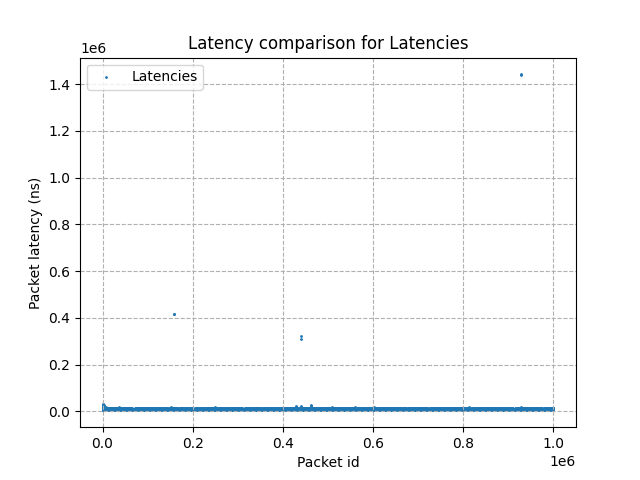

In [22]:
lib.plot_latencies((lats, "Latencies"), iters=settings.iters)

Using threshold 15238.78276116871ns


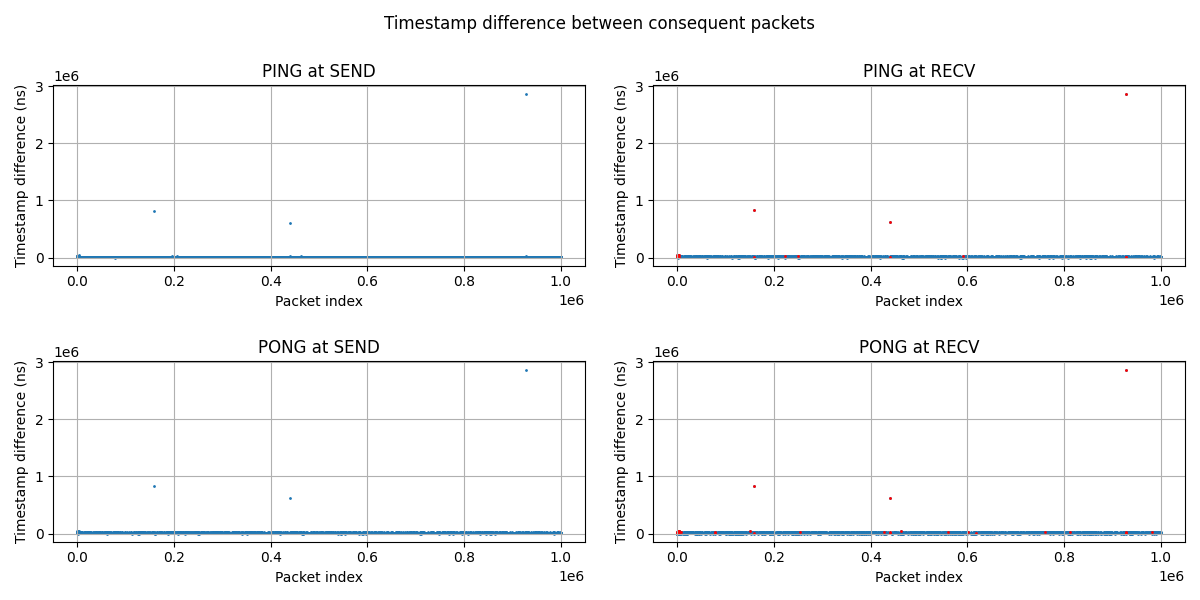

In [23]:
lib.plot_diffs(diffs, iters=settings.iters)

In [7]:
ts[:,3].size

1000000

## Coalecensce effect
Adaptive interrupt coalencensce has an impact on latency which is throughput-dependent and forms peculiar patterns.

In [8]:
ts1 = lib.parse_timestamps("../data/xsk_1M_10us_adaptiverx-on-1.dat")
diffs1 = lib.compute_diffs(ts1)
lats1 = lib.compute_latencies(ts1)
# jitters = lib.compute_jitter(lats)

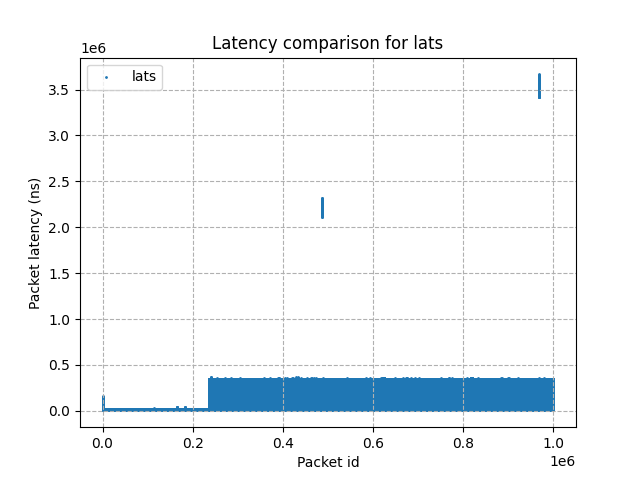

In [9]:
lib.plot_latencies((lats1, "lats"), iters=settings.iters)

Using threshold 132653.4865527861ns


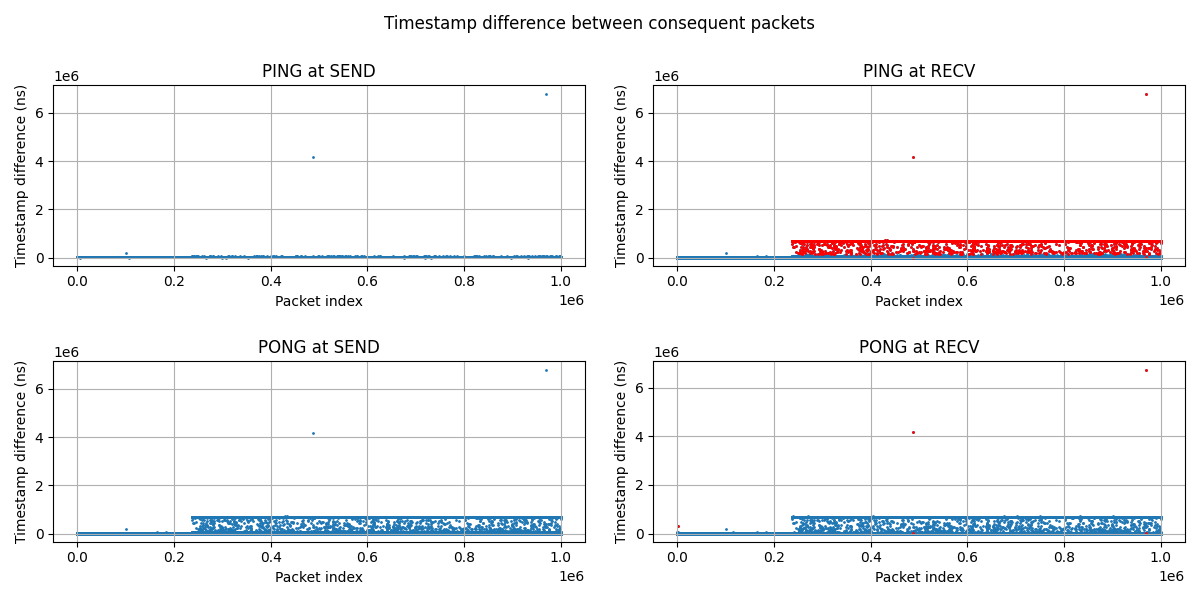

In [10]:
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 44612.63370669846ns


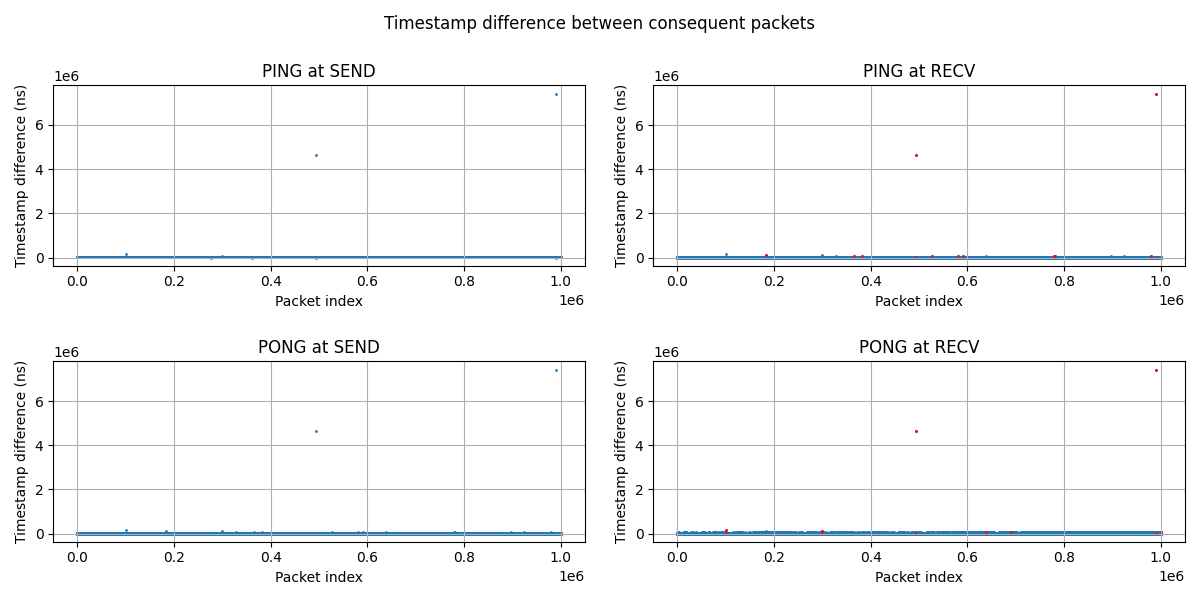

In [11]:
ts1 = lib.parse_timestamps("../data/xsk_1M_10us_adaptiverx-off.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 878424295543.057ns


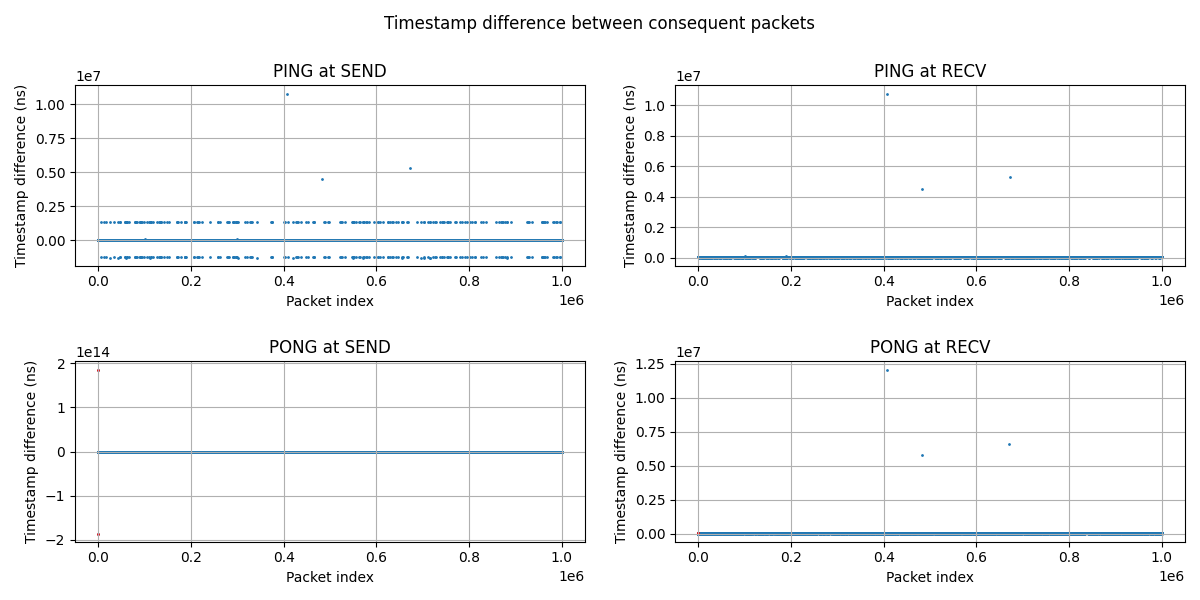

In [12]:
ts1 = lib.parse_timestamps("../data/poll_1M_10us_adaptivetx-on.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 52437.44236404629ns


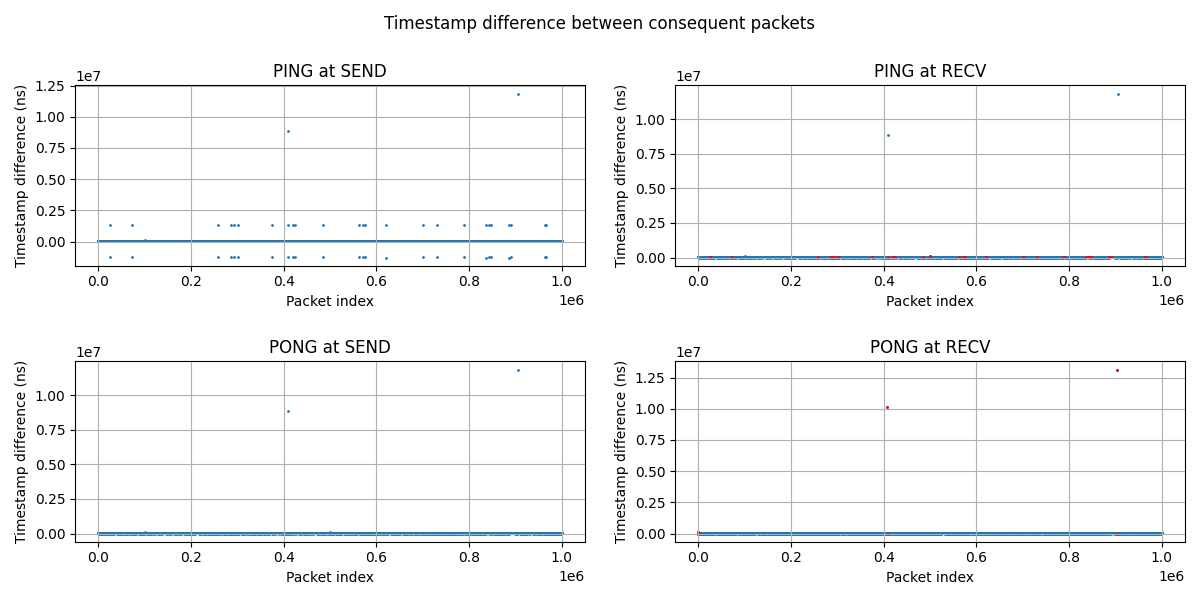

In [13]:
ts1 = lib.parse_timestamps("../data/poll_1M_10us_adaptivetx-on-2.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)

## Long periodic effect
Another, separate effect appears with periodic outliers rather. It seems to be time-dependent rather than # of packet dependent as observed previously.

In [14]:
ts1 = lib.parse_timestamps("../data/poll_1M_100us.dat")
diffs1 = lib.compute_diffs(ts1)
lats1 = lib.compute_latencies(ts1)
# jitters = lib.compute_jitter(lats)

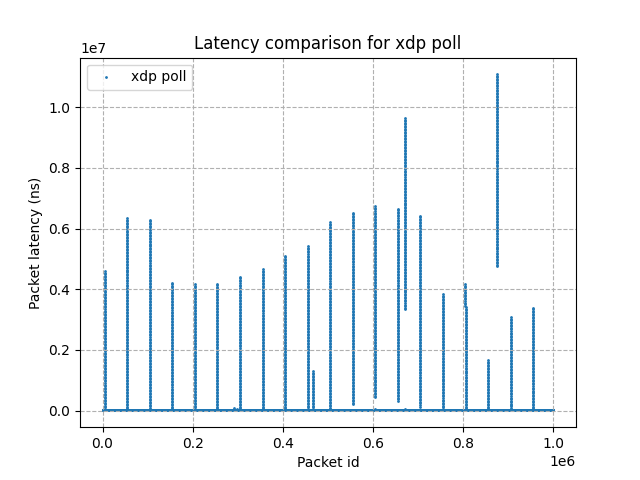

In [15]:
lib.plot_latencies((lats1, "xdp poll"), iters=settings.iters)

Using threshold 93549.31730408786ns


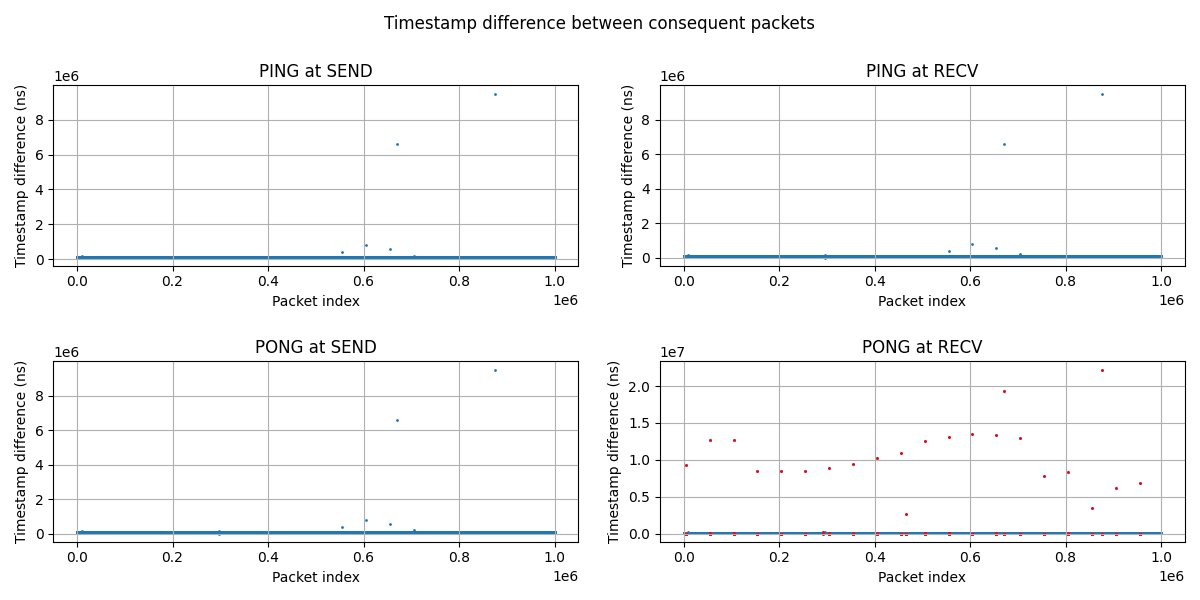

In [16]:
lib.plot_diffs(diffs1, iters=settings.iters)

In [17]:
ts1 = lib.parse_timestamps("../data/xsk_1M_100us.dat")
diffs1 = lib.compute_diffs(ts1)
lats1 = lib.compute_latencies(ts1)
# jitters = lib.compute_jitter(lats)

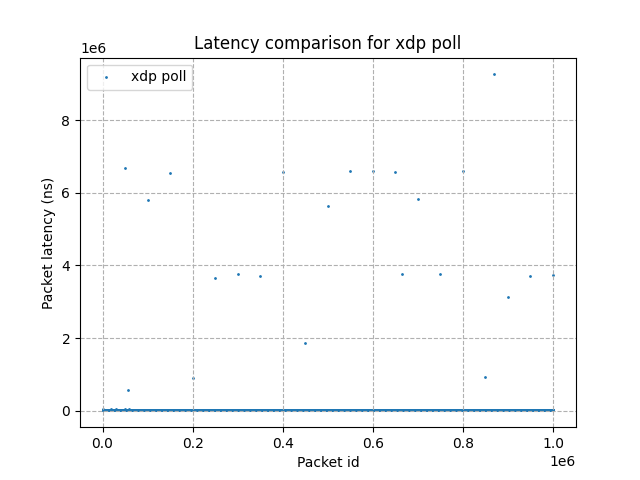

In [18]:
lib.plot_latencies((lats1, "xdp poll"), iters=settings.iters)

Using threshold 117161.42129868311ns


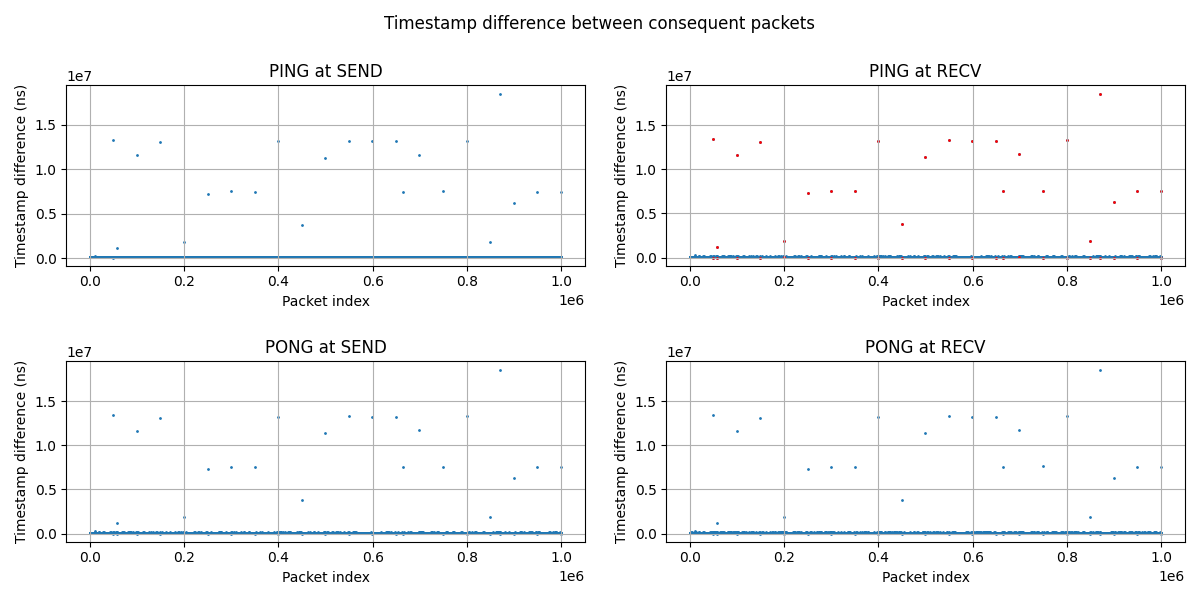

In [19]:
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 81916.38733930785ns


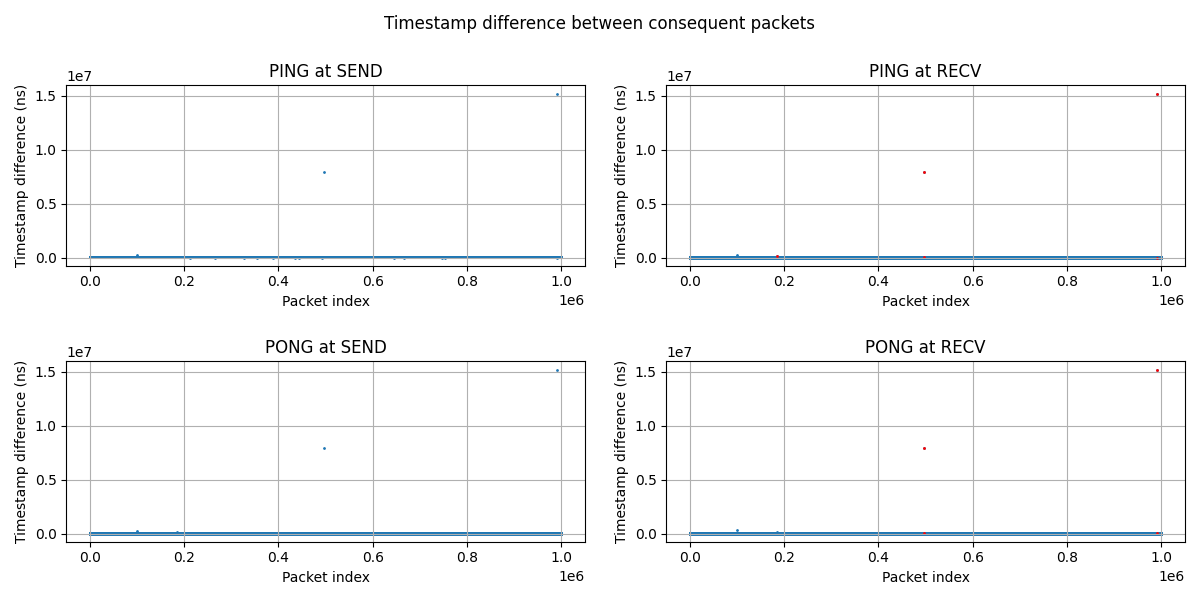

In [20]:
ts1 = lib.parse_timestamps("../data/xsk_300k_10us_off.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)